## Options

In [1]:
alpha <- 0.05
p <- 0.4
sampleSize <- 1000

In [2]:
startExp <- 0
endExp <- 4

## Functions

In [3]:
IsInInterval <- function(center, width, x) {
    # Return TRUE if x is in interval (center-width, center+width)
    return ((center - width) < x && x < (center + width))
}

In [4]:
CntBernoulliOverlap <- function(n, p, sampleSize, alpha) {
    # Return how often the Bernoulli-parameter p is in interval
    #
    # Args:
    #   n: Bernoulli Trials
    #   p: Bernoulli-parameter
    #   sampleSize:
    #   alpha:
    eps <- sqrt(1/(2*n) * log(2/alpha))
    
    sampleBernSum <- rbinom(sampleSize, n, p)
    sampleMean <- sampleBernSum / n

    sampleInInterval <- sapply(sampleMean, IsInInterval, width=eps, x=p)
    return (sum(sampleInInterval))
}

## Setup

In [5]:
ns <- 10^(startExp:endExp)
ns

[1]     1    10   100  1000 10000

## Simulation

In [6]:
counts <- sapply(ns, CntBernoulliOverlap, p=p, sampleSize=sampleSize, alpha=alpha) 
counts

[1] 1000  998  996  993  994

## Results-Plots

In [7]:
require('ggplot2')

Loading required package: ggplot2


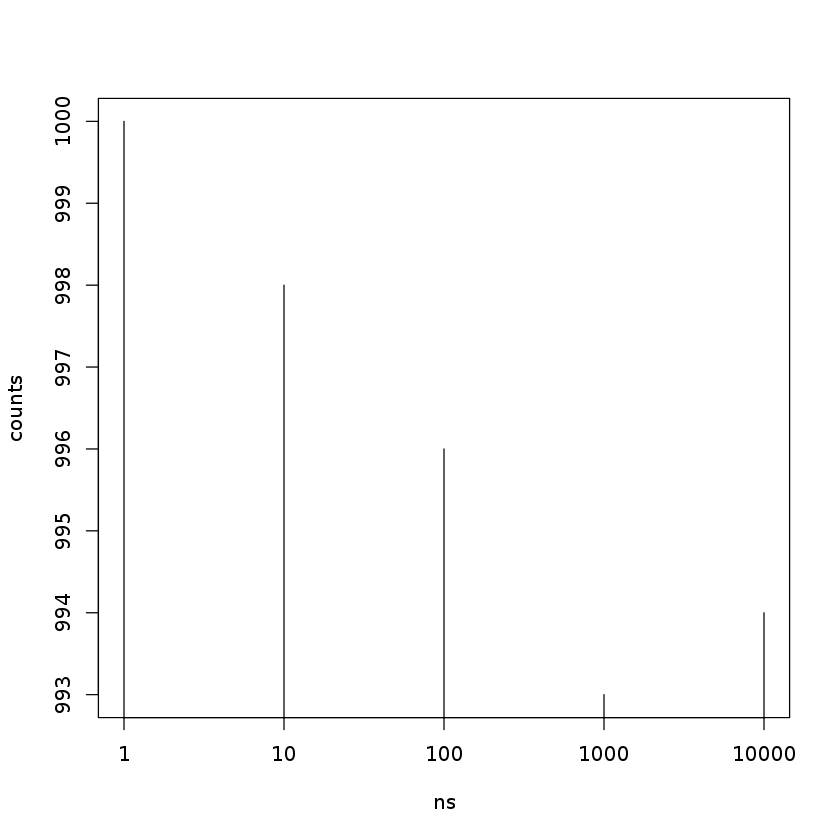

In [8]:
plot(ns, counts, log="x", type="h")